Dataset Head:
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  

Dataset Columns:
Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classificati

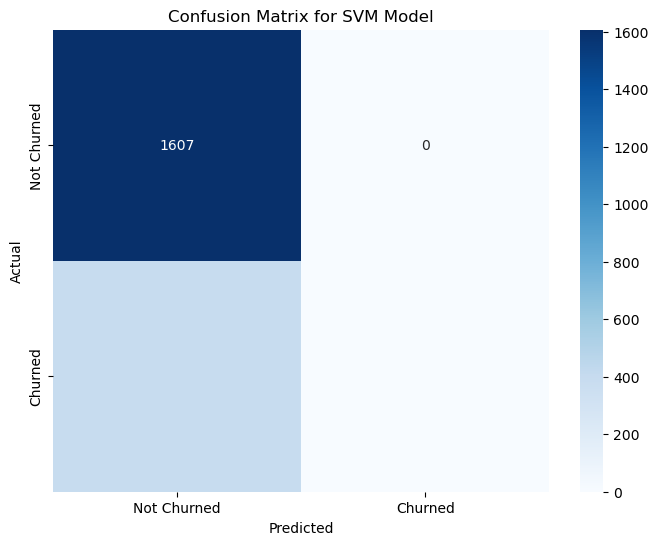

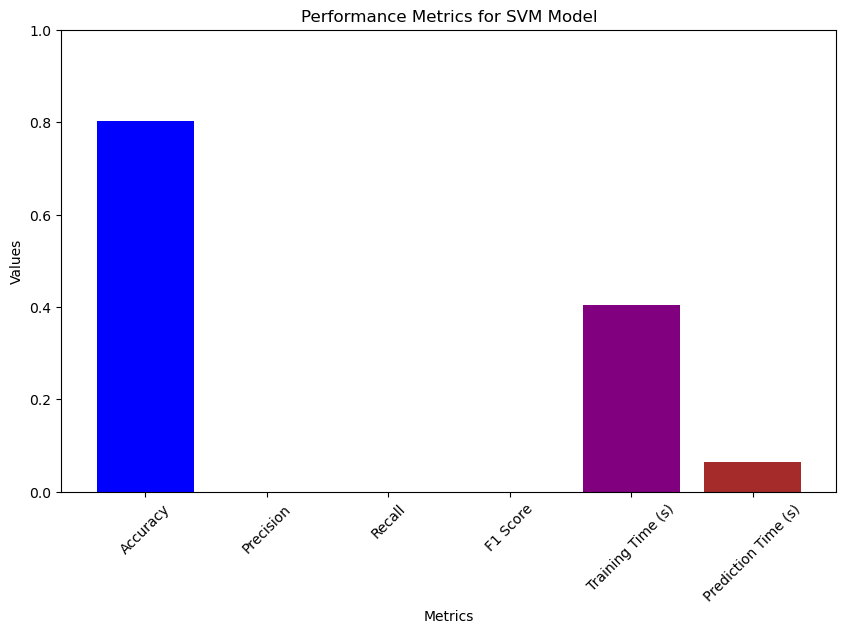

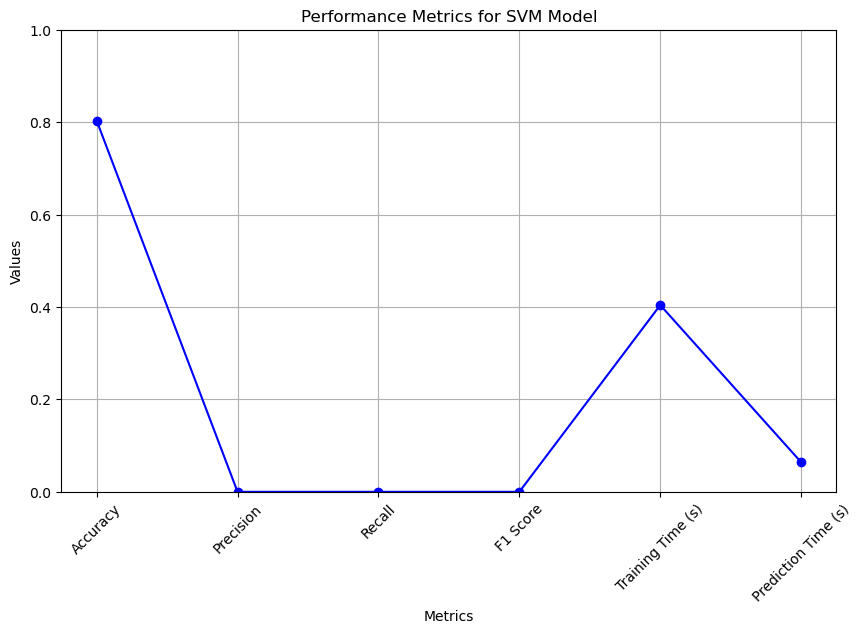

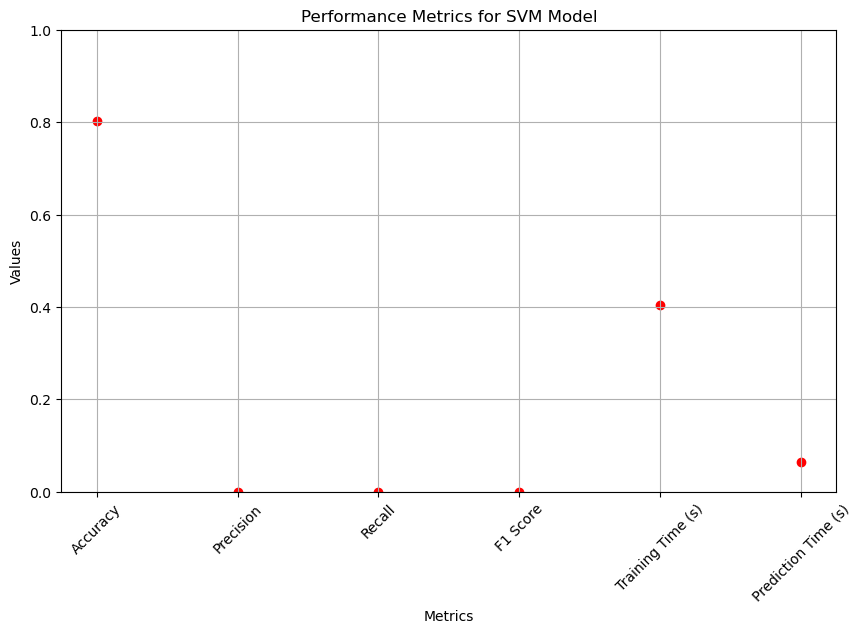

In [14]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import time

# Load the dataset
data = pd.read_csv('/Users/karanpandre/Documents/INTERNSHIP/HPC /case_study(28/6)/bank_customer.csv')

# Display the first few rows of the dataset and columns
print("Dataset Head:")
print(data.head())

print("\nDataset Columns:")
print(data.columns)

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Drop rows with missing values (if any)
data.dropna(inplace=True)

# Convert categorical variables to numerical using Label Encoding
# Convert 'gender' and 'country' to numerical values
le_gender = LabelEncoder()
data['gender'] = le_gender.fit_transform(data['gender'])

le_country = LabelEncoder()
data['country'] = le_country.fit_transform(data['country'])

# Define features and target variable
X = data.drop(['customer_id', 'churn'], axis=1)  # Drop 'customer_id' and 'churn'
y = data['churn']

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model
model = SVC(kernel='linear', random_state=42)

# Train the model
start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions
start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Summarize the metrics in a table
metrics = {
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Training Time (s)': [training_time],
    'Prediction Time (s)': [prediction_time]
}

metrics_df = pd.DataFrame(metrics, index=['SVM'])

print("\nSVM Performance Metrics:")
print(metrics_df)

print("\nClassification Report:")
print(report)

print("\nConfusion Matrix:")
print(conf_matrix)

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churned', 'Churned'], 
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model')
plt.show()

# Bar Plot of Performance Metrics
metrics_names = metrics_df.columns
metrics_values = metrics_df.loc['SVM']

plt.figure(figsize=(10, 6))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red', 'purple', 'brown'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for SVM Model')
plt.ylim(0, 1 if all(val <= 1 for val in metrics_values) else max(metrics_values) + 1)
plt.xticks(rotation=45)
plt.show()

# Line Plot of Performance Metrics
plt.figure(figsize=(10, 6))
plt.plot(metrics_names, metrics_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for SVM Model')
plt.ylim(0, 1 if all(val <= 1 for val in metrics_values) else max(metrics_values) + 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Scatter Plot of Performance Metrics
plt.figure(figsize=(10, 6))
plt.scatter(metrics_names, metrics_values, color='red')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for SVM Model')
plt.ylim(0, 1 if all(val <= 1 for val in metrics_values) else max(metrics_values) + 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


                Metric       SVM  Decision Tree
0             Accuracy  0.805333       0.794000
1            Precision  0.000000       0.473016
2               Recall  0.000000       0.510274
3             F1 Score  0.000000       0.490939
4    Training Time (s)  0.307253       0.022518
5  Prediction Time (s)  0.086970       0.000739


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


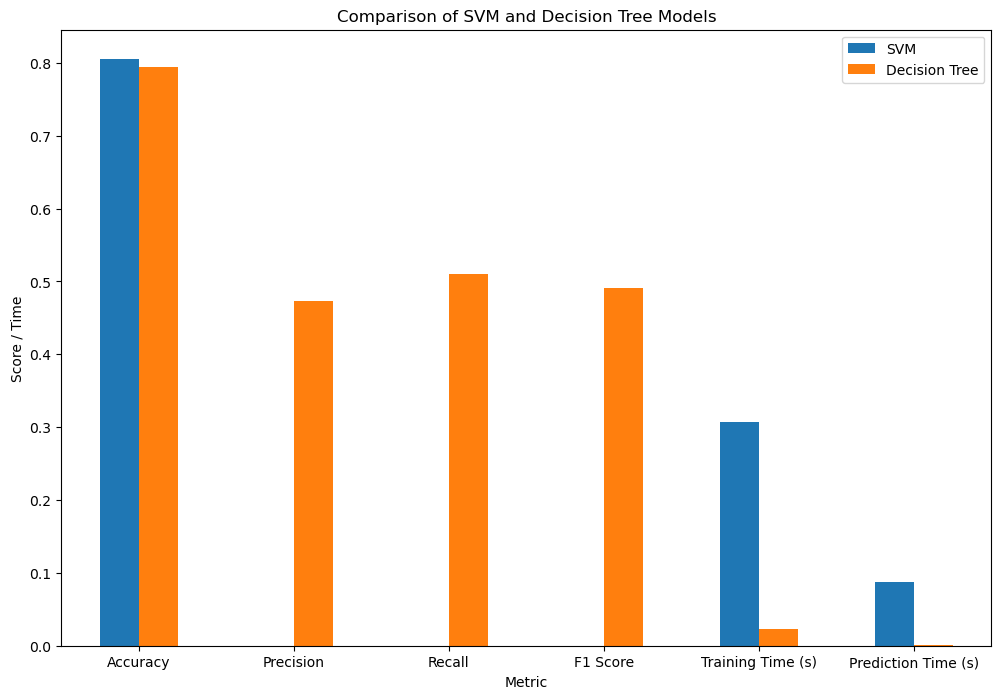

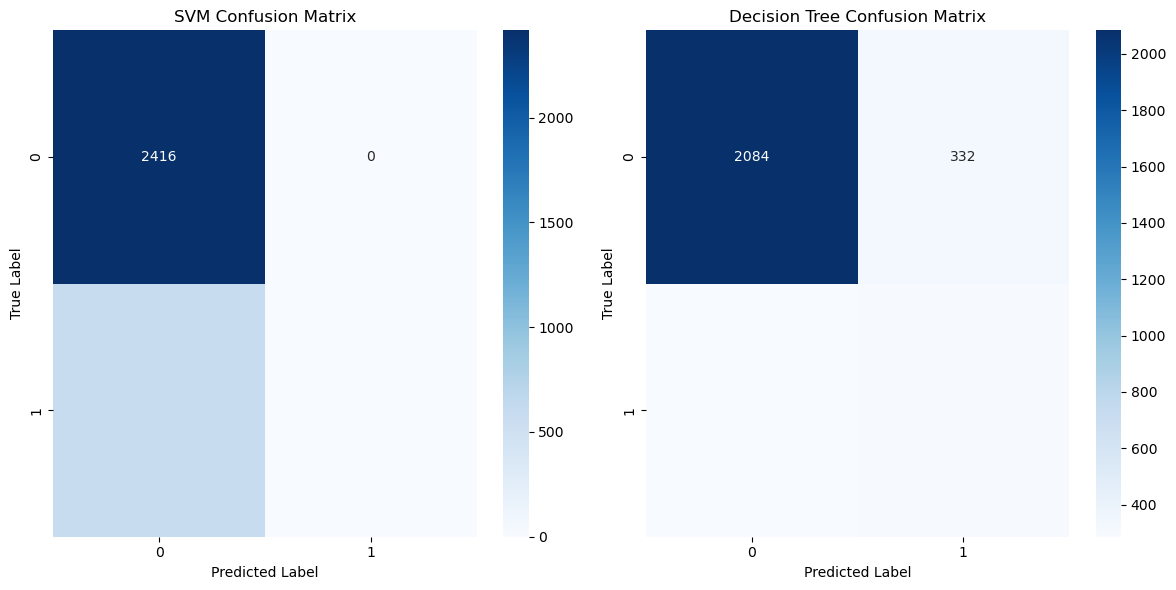

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('/Users/karanpandre/Documents/INTERNSHIP/HPC /case_study(28/6)/bank_customer.csv')

# Drop the customer_id column as it is not useful for prediction
data = data.drop(columns=['customer_id'])

# Encode categorical features
label_encoder = LabelEncoder()
data['country'] = label_encoder.fit_transform(data['country'])
data['gender'] = label_encoder.fit_transform(data['gender'])

# Split the data into features and target variable
X = data.drop(columns=['churn'])
y = data['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- SVM Model ---

# Train the SVM model and measure training time
start_time = time.time()
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_pred_svm = svm_model.predict(X_test_scaled)
svm_prediction_time = time.time() - start_time

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# --- Decision Tree Model ---

# Train the Decision Tree model and measure training time
start_time = time.time()
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
tree_training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_pred_tree = decision_tree_model.predict(X_test)
tree_prediction_time = time.time() - start_time

# Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

# Create a DataFrame for the metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time (s)', 'Prediction Time (s)'],
    'SVM': [accuracy_svm, precision_svm, recall_svm, f1_svm, svm_training_time, svm_prediction_time],
    'Decision Tree': [accuracy_tree, precision_tree, recall_tree, f1_tree, tree_training_time, tree_prediction_time]
}
metrics_df = pd.DataFrame(metrics)

# Print the metrics table
print(metrics_df)

# Plot the metrics
metrics_df.set_index('Metric').plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of SVM and Decision Tree Models')
plt.ylabel('Score / Time')
plt.xlabel('Metric')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

# Plot the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('SVM Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


Dataset Head:
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  

Dataset Columns:
Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance

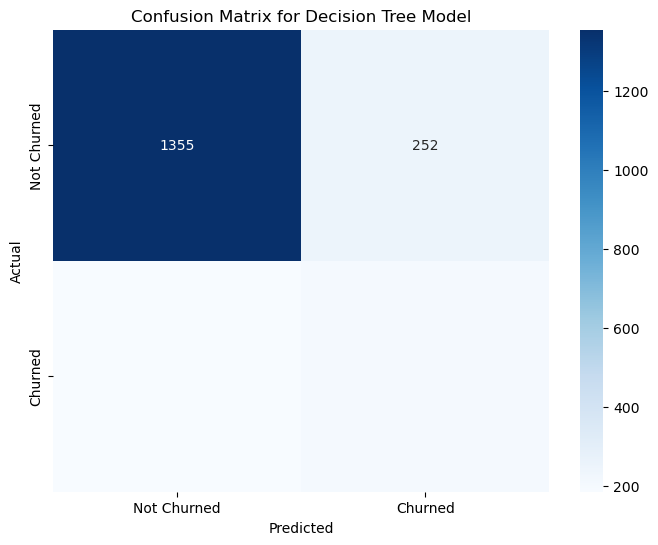

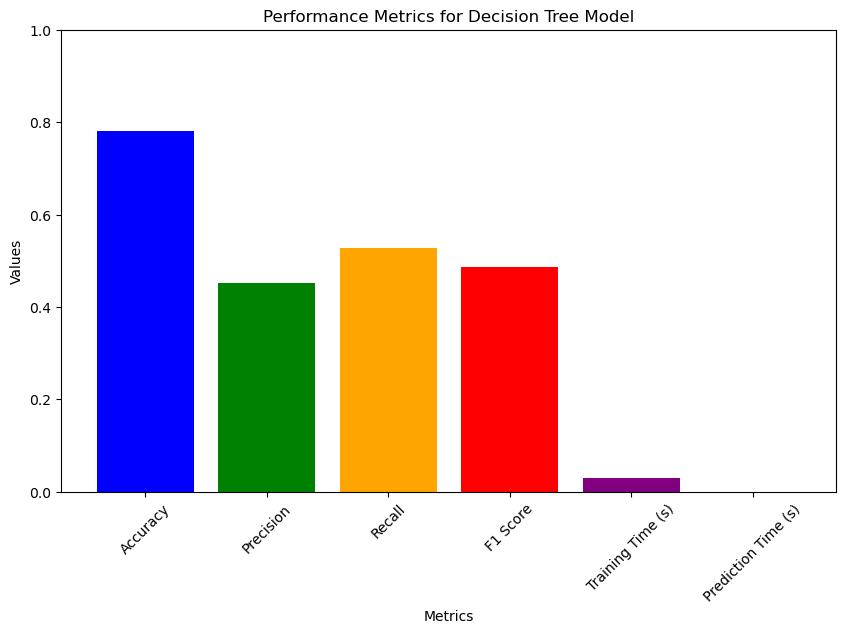

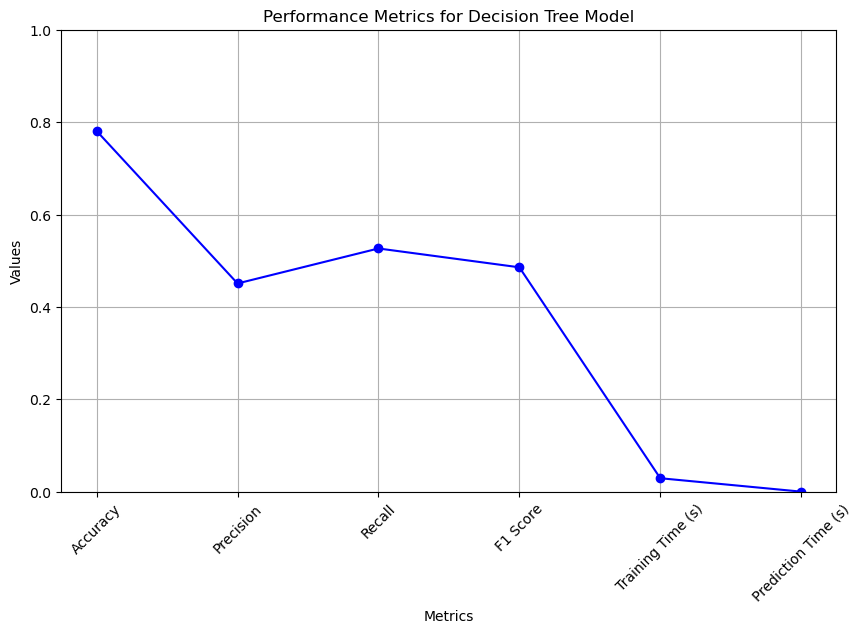

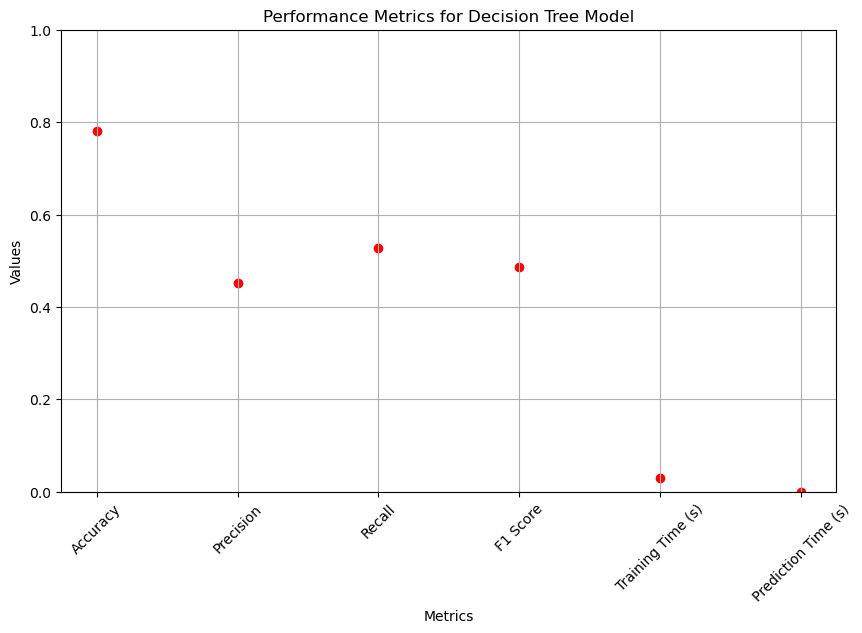

In [19]:
# Install necessary libraries
# !pip install numpy pandas scikit-learn matplotlib seaborn

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import time

# Load the dataset
data = pd.read_csv('/Users/karanpandre/Documents/INTERNSHIP/HPC /case_study(28/6)/bank_customer.csv')

# Display the first few rows of the dataset and columns
print("Dataset Head:")
print(data.head())

print("\nDataset Columns:")
print(data.columns)

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Drop rows with missing values (if any)
data.dropna(inplace=True)

# Convert categorical variables to numerical using Label Encoding
# Convert 'gender' and 'country' to numerical values
le_gender = LabelEncoder()
data['gender'] = le_gender.fit_transform(data['gender'])

le_country = LabelEncoder()
data['country'] = le_country.fit_transform(data['country'])

# Define features and target variable
X = data.drop(['customer_id', 'churn'], axis=1)  # Drop 'customer_id' and 'churn'
y = data['churn']

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions
start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Summarize the metrics in a table
metrics = {
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Training Time (s)': [training_time],
    'Prediction Time (s)': [prediction_time]
}

metrics_df = pd.DataFrame(metrics, index=['Decision Tree'])

print("\nDecision Tree Performance Metrics:")
print(metrics_df)

print("\nClassification Report:")
print(report)

print("\nConfusion Matrix:")
print(conf_matrix)

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churned', 'Churned'], 
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

# Bar Plot of Performance Metrics
metrics_names = metrics_df.columns
metrics_values = metrics_df.loc['Decision Tree']

plt.figure(figsize=(10, 6))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red', 'purple', 'brown'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for Decision Tree Model')
plt.ylim(0, 1 if all(val <= 1 for val in metrics_values) else max(metrics_values) + 1)
plt.xticks(rotation=45)
plt.show()

# Line Plot of Performance Metrics
plt.figure(figsize=(10, 6))
plt.plot(metrics_names, metrics_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for Decision Tree Model')
plt.ylim(0, 1 if all(val <= 1 for val in metrics_values) else max(metrics_values) + 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Scatter Plot of Performance Metrics
plt.figure(figsize=(10, 6))
plt.scatter(metrics_names, metrics_values, color='red')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for Decision Tree Model')
plt.ylim(0, 1 if all(val <= 1 for val in metrics_values) else max(metrics_values) + 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                Metric       SVM  Decision Tree    Hybrid
0             Accuracy  0.805333       0.794000  0.805333
1            Precision  0.000000       0.473016       0.0
2               Recall  0.000000       0.510274       0.0
3             F1 Score  0.000000       0.490939       0.0
4    Training Time (s)  0.358849       0.032669         -
5  Prediction Time (s)  0.089504       0.002323         -


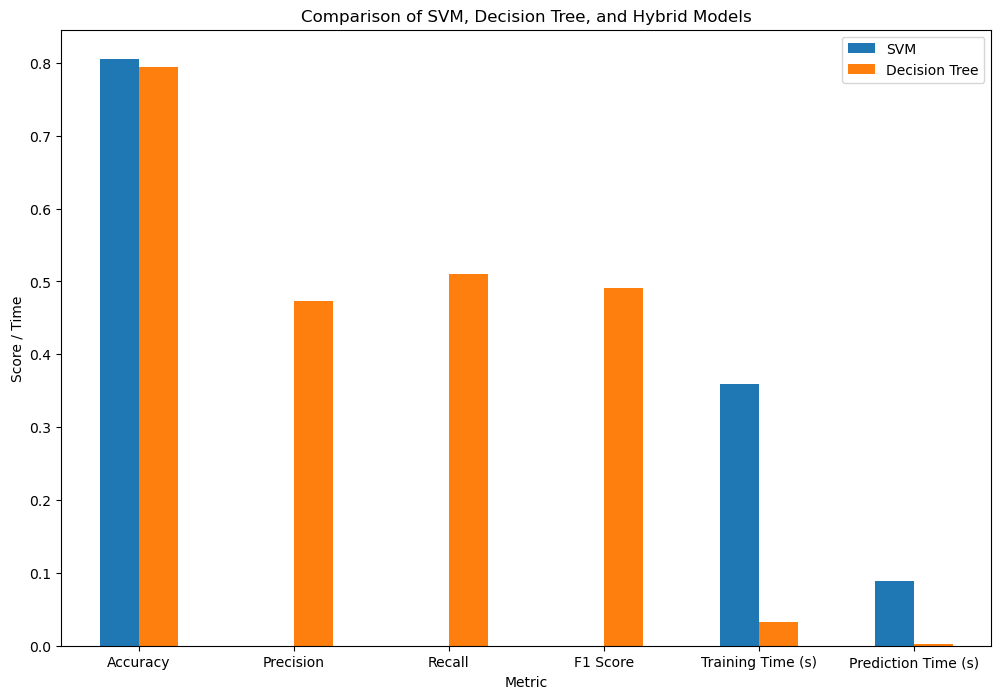

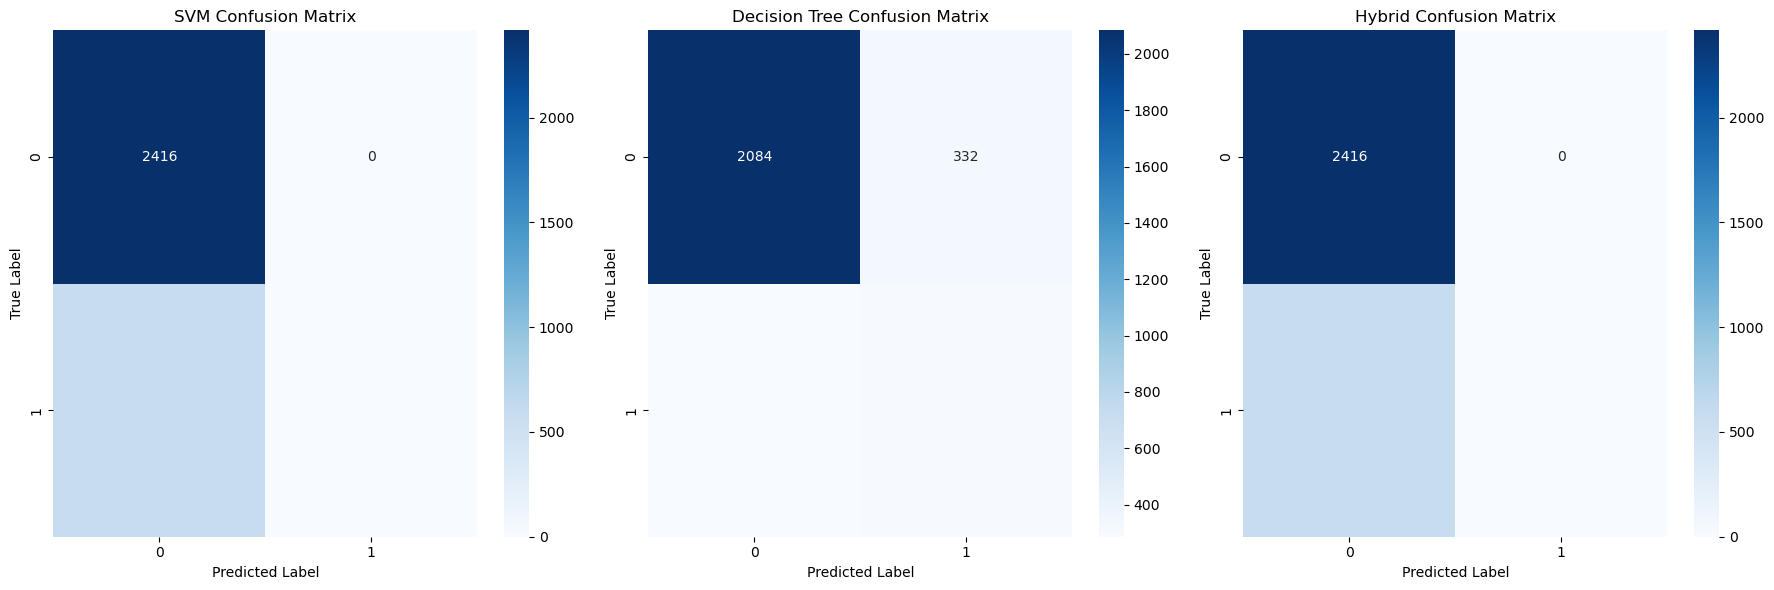

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
data = pd.read_csv('/Users/karanpandre/Documents/INTERNSHIP/HPC /case_study(28/6)/bank_customer.csv')

# Drop the customer_id column as it is not useful for prediction
data = data.drop(columns=['customer_id'])

# Encode categorical features
label_encoder = LabelEncoder()
data['country'] = label_encoder.fit_transform(data['country'])
data['gender'] = label_encoder.fit_transform(data['gender'])

# Split the data into features and target variable
X = data.drop(columns=['churn'])
y = data['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- SVM Model ---
# Train the SVM model and measure training time
start_time = time.time()
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_pred_svm = svm_model.predict(X_test_scaled)
svm_prediction_time = time.time() - start_time

# --- Decision Tree Model ---
# Train the Decision Tree model and measure training time
start_time = time.time()
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
tree_training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_pred_tree = decision_tree_model.predict(X_test)
tree_prediction_time = time.time() - start_time

# --- Hybrid Model ---
# Combine predictions from SVM and Decision Tree
y_pred_hybrid = (y_pred_svm + y_pred_tree) // 2  # Majority vote

# Evaluate the Hybrid model
accuracy_hybrid = accuracy_score(y_test, y_pred_hybrid)
precision_hybrid = precision_score(y_test, y_pred_hybrid)
recall_hybrid = recall_score(y_test, y_pred_hybrid)
f1_hybrid = f1_score(y_test, y_pred_hybrid)

# Create a DataFrame for the metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time (s)', 'Prediction Time (s)'],
    'SVM': [accuracy_score(y_test, y_pred_svm), precision_score(y_test, y_pred_svm), recall_score(y_test, y_pred_svm), f1_score(y_test, y_pred_svm), svm_training_time, svm_prediction_time],
    'Decision Tree': [accuracy_score(y_test, y_pred_tree), precision_score(y_test, y_pred_tree), recall_score(y_test, y_pred_tree), f1_score(y_test, y_pred_tree), tree_training_time, tree_prediction_time],
    'Hybrid': [accuracy_hybrid, precision_hybrid, recall_hybrid, f1_hybrid, '-', '-']
}
metrics_df = pd.DataFrame(metrics)

# Print the metrics table
print(metrics_df)

# Plot the metrics
metrics_df.set_index('Metric').plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of SVM, Decision Tree, and Hybrid Models')
plt.ylabel('Score / Time')
plt.xlabel('Metric')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

# Plot the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('SVM Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

sns.heatmap(confusion_matrix(y_test, y_pred_hybrid), annot=True, fmt='d', ax=axes[2], cmap='Blues')
axes[2].set_title('Hybrid Confusion Matrix')
axes[2].set_xlabel('Predicted Label')
axes[2].set_ylabel('True Label')

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                Metric       SVM  Decision Tree    Hybrid
0             Accuracy  0.805333       0.794000  0.796000
1            Precision  0.000000       0.473016  0.477636
2               Recall  0.000000       0.510274  0.511986
3             F1 Score  0.000000       0.490939  0.494215
4    Training Time (s)  0.303226       0.024173  1.636059
5  Prediction Time (s)  0.084336       0.001022  0.085842


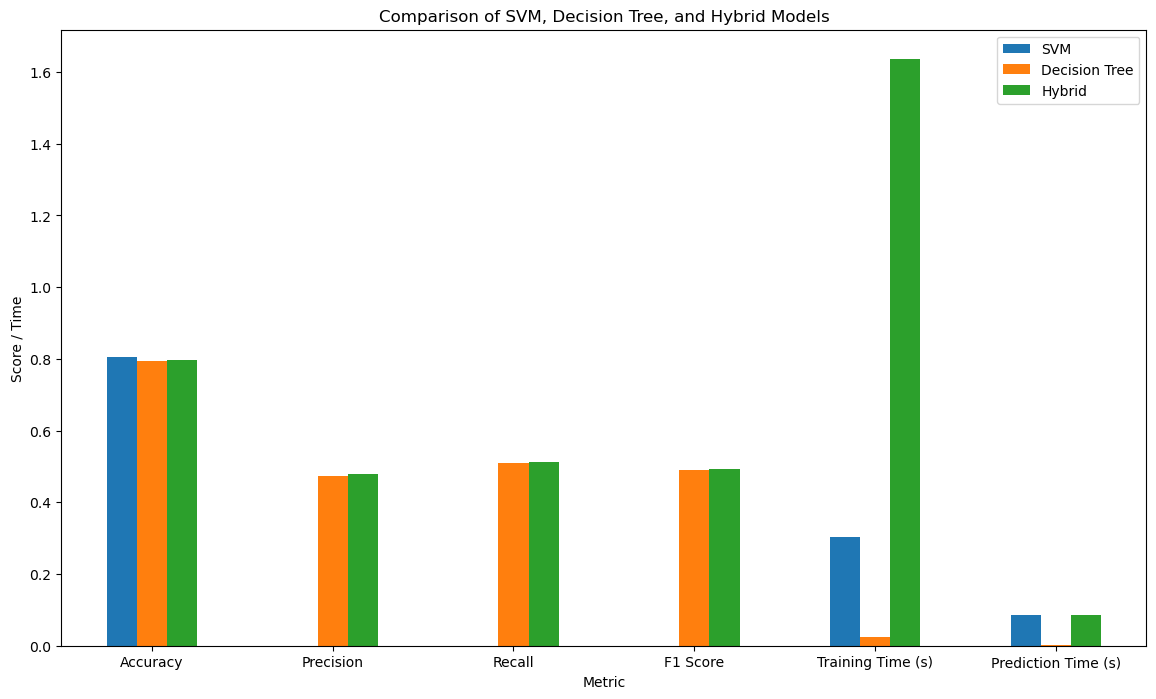

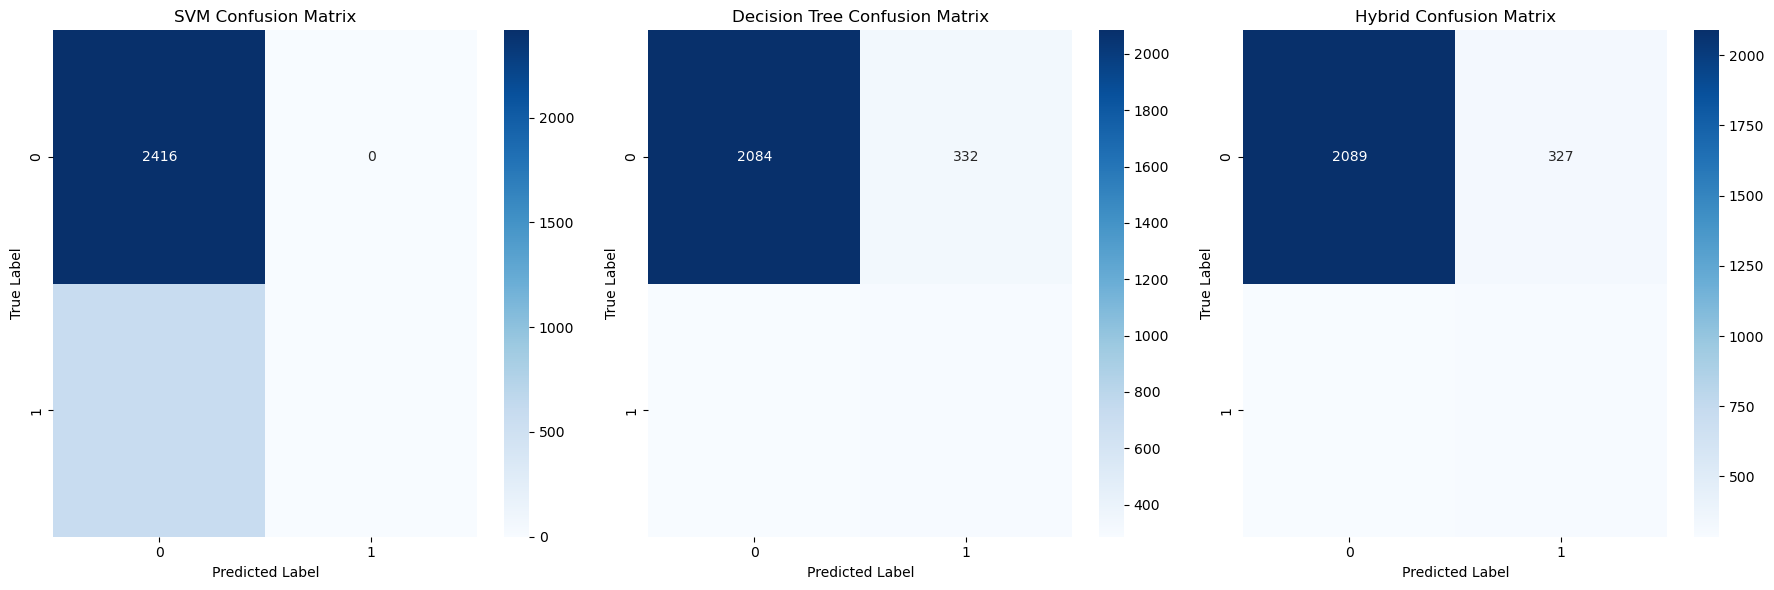

In [4]:
# Install necessary libraries
# !pip install numpy pandas scikit-learn matplotlib seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
data = pd.read_csv('/Users/karanpandre/Documents/INTERNSHIP/HPC /case_study(28/6)/bank_customer.csv')

# Drop the customer_id column as it is not useful for prediction
data = data.drop(columns=['customer_id'])

# Encode categorical features
label_encoder = LabelEncoder()
data['country'] = label_encoder.fit_transform(data['country'])
data['gender'] = label_encoder.fit_transform(data['gender'])

# Split the data into features and target variable
X = data.drop(columns=['churn'])
y = data['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- SVM Model ---
# Train the SVM model and measure training time
start_time = time.time()
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_pred_svm = svm_model.predict(X_test_scaled)
svm_prediction_time = time.time() - start_time

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# --- Decision Tree Model ---
# Train the Decision Tree model and measure training time
start_time = time.time()
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
tree_training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_pred_tree = decision_tree_model.predict(X_test)
tree_prediction_time = time.time() - start_time

# Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

# --- Hybrid Model (Voting Classifier) ---
# Initialize the Voting Classifier with SVM and Decision Tree
voting_clf = VotingClassifier(estimators=[
    ('svm', SVC(kernel='linear', probability=True, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
], voting='soft')

# Train the Voting Classifier and measure training time
start_time = time.time()
voting_clf.fit(X_train_scaled, y_train)
hybrid_training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_pred_hybrid = voting_clf.predict(X_test_scaled)
hybrid_prediction_time = time.time() - start_time

# Evaluate the Voting Classifier
accuracy_hybrid = accuracy_score(y_test, y_pred_hybrid)
precision_hybrid = precision_score(y_test, y_pred_hybrid)
recall_hybrid = recall_score(y_test, y_pred_hybrid)
f1_hybrid = f1_score(y_test, y_pred_hybrid)

# Create a DataFrame for the metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time (s)', 'Prediction Time (s)'],
    'SVM': [accuracy_svm, precision_svm, recall_svm, f1_svm, svm_training_time, svm_prediction_time],
    'Decision Tree': [accuracy_tree, precision_tree, recall_tree, f1_tree, tree_training_time, tree_prediction_time],
    'Hybrid': [accuracy_hybrid, precision_hybrid, recall_hybrid, f1_hybrid, hybrid_training_time, hybrid_prediction_time]
}
metrics_df = pd.DataFrame(metrics)

# Print the metrics table
print(metrics_df)

# Plot the metrics
metrics_df.set_index('Metric').plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of SVM, Decision Tree, and Hybrid Models')
plt.ylabel('Score / Time')
plt.xlabel('Metric')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

# Plot the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('SVM Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

sns.heatmap(confusion_matrix(y_test, y_pred_hybrid), annot=True, fmt='d', ax=axes[2], cmap='Blues')
axes[2].set_title('Hybrid Confusion Matrix')
axes[2].set_xlabel('Predicted Label')
axes[2].set_ylabel('True Label')

plt.tight_layout()
plt.show()


                Metric       SVM  Decision Tree    Hybrid
0             Accuracy  0.709000       0.796667  0.797333
1            Precision  0.367553       0.478618  0.480066
2               Recall  0.686644       0.498288  0.494863
3             F1 Score  0.478806       0.488255  0.487352
4    Training Time (s)  0.909022       0.024156  4.057969
5  Prediction Time (s)  0.143692       0.000883  0.127620


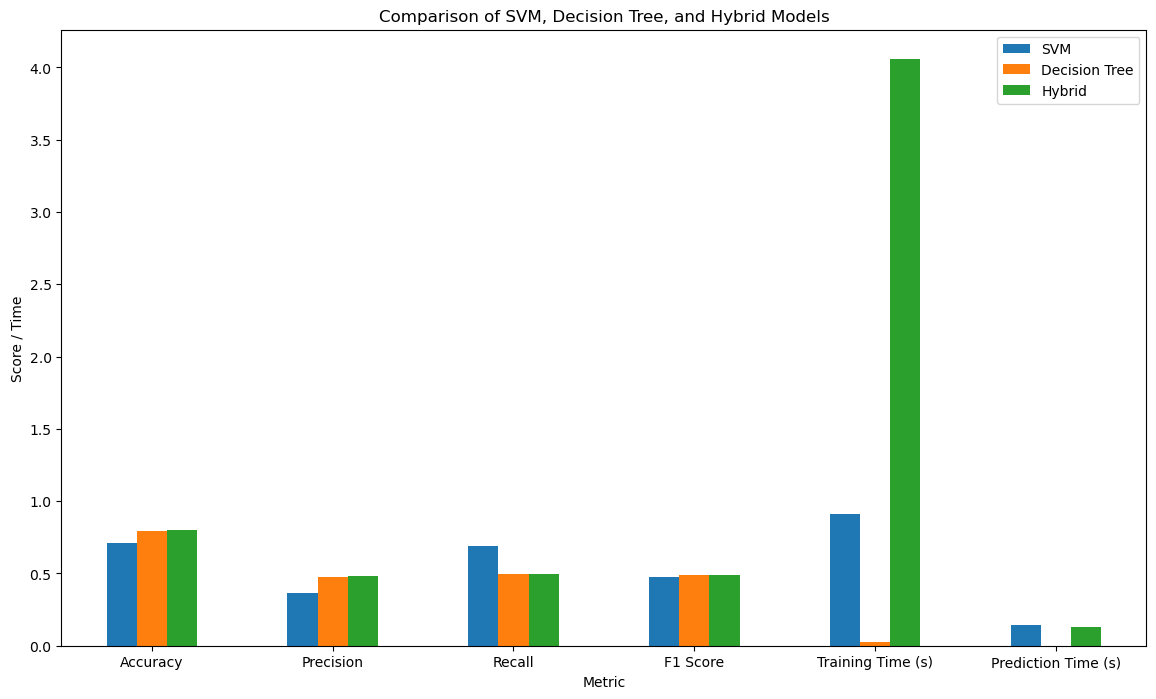

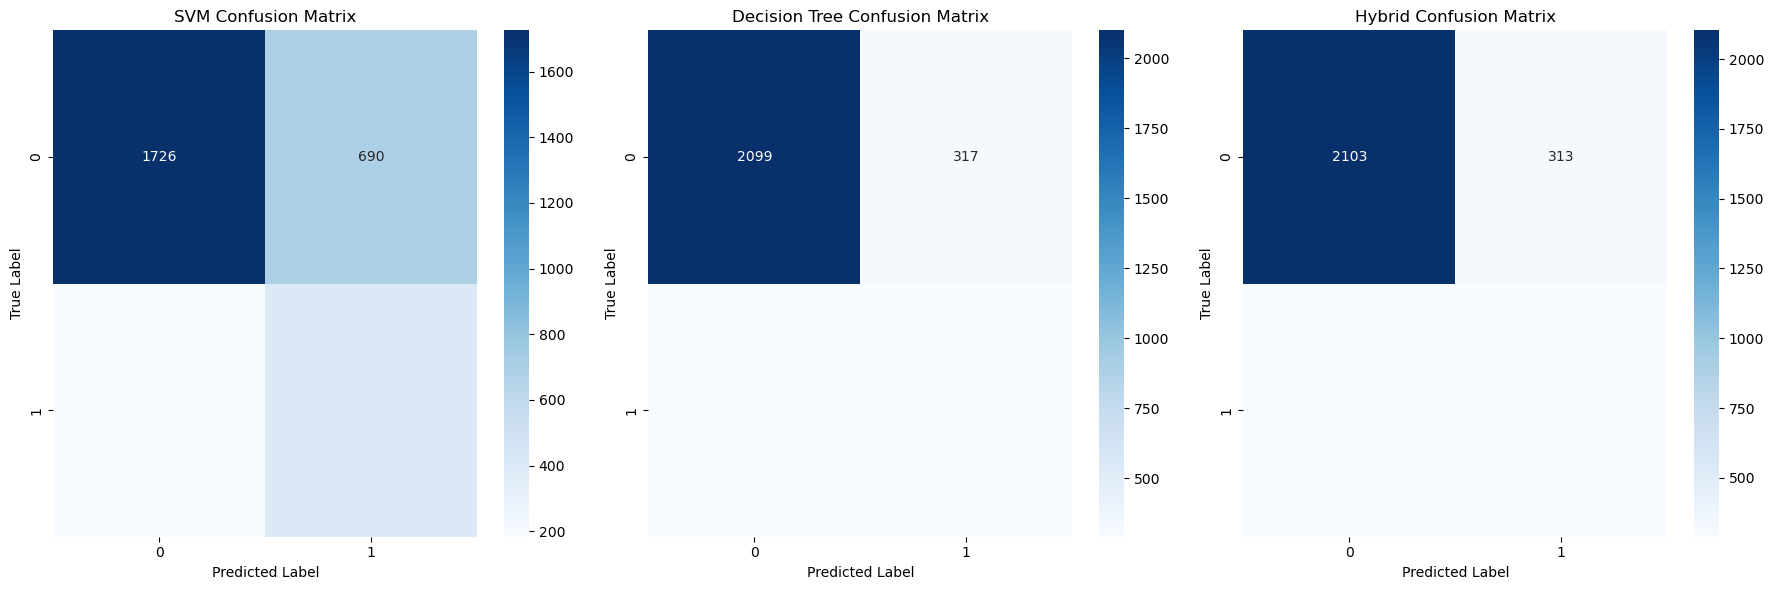

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
data = pd.read_csv('/Users/karanpandre/Documents/INTERNSHIP/HPC /case_study(28/6)/bank_customer.csv')

# Drop the customer_id column as it is not useful for prediction
data = data.drop(columns=['customer_id'])

# Encode categorical features
label_encoder = LabelEncoder()
data['country'] = label_encoder.fit_transform(data['country'])
data['gender'] = label_encoder.fit_transform(data['gender'])

# Split the data into features and target variable
X = data.drop(columns=['churn'])
y = data['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- SVM Model ---
# Train the SVM model and measure training time
start_time = time.time()
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_pred_svm = svm_model.predict(X_test_scaled)
svm_prediction_time = time.time() - start_time

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, zero_division=1)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# --- Decision Tree Model ---
# Train the Decision Tree model and measure training time
start_time = time.time()
decision_tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
decision_tree_model.fit(X_train, y_train)
tree_training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_pred_tree = decision_tree_model.predict(X_test)
tree_prediction_time = time.time() - start_time

# Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, zero_division=1)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

# --- Hybrid Model (Voting Classifier) ---
# Initialize the Voting Classifier with SVM and Decision Tree
voting_clf = VotingClassifier(estimators=[
    ('svm', SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42)),
    ('dt', DecisionTreeClassifier(class_weight='balanced', random_state=42))
], voting='soft')

# Train the Voting Classifier and measure training time
start_time = time.time()
voting_clf.fit(X_train_scaled, y_train)
hybrid_training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_pred_hybrid = voting_clf.predict(X_test_scaled)
hybrid_prediction_time = time.time() - start_time

# Evaluate the Voting Classifier
accuracy_hybrid = accuracy_score(y_test, y_pred_hybrid)
precision_hybrid = precision_score(y_test, y_pred_hybrid, zero_division=1)
recall_hybrid = recall_score(y_test, y_pred_hybrid)
f1_hybrid = f1_score(y_test, y_pred_hybrid)

# Create a DataFrame for the metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time (s)', 'Prediction Time (s)'],
    'SVM': [accuracy_svm, precision_svm, recall_svm, f1_svm, svm_training_time, svm_prediction_time],
    'Decision Tree': [accuracy_tree, precision_tree, recall_tree, f1_tree, tree_training_time, tree_prediction_time],
    'Hybrid': [accuracy_hybrid, precision_hybrid, recall_hybrid, f1_hybrid, hybrid_training_time, hybrid_prediction_time]
}
metrics_df = pd.DataFrame(metrics)

# Print the metrics table
print(metrics_df)

# Plot the metrics
metrics_df.set_index('Metric').plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of SVM, Decision Tree, and Hybrid Models')
plt.ylabel('Score / Time')
plt.xlabel('Metric')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

# Plot the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('SVM Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

sns.heatmap(confusion_matrix(y_test, y_pred_hybrid), annot=True, fmt='d', ax=axes[2], cmap='Blues')
axes[2].set_title('Hybrid Confusion Matrix')
axes[2].set_xlabel('Predicted Label')
axes[2].set_ylabel('True Label')

plt.tight_layout()
plt.show()
